# TEXT CLASSIFICATION USING LSTM MODEL

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# importing the dataset csv file

In [5]:
df = pd.read_csv('Consumer_Complaints.csv')

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [7]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
#choosing only two columns
data = df[['Consumer complaint narrative', 'Product']]

In [9]:
data.head()

,Consumer complaint narrative,Product
0,NaN,Mortgage
1,I have outdated information on my credit repor...,Credit reporting
2,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
3,NaN,Credit card
4,NaN,Debt collection


In [10]:
#removing the rows having NULL values
data_df = data.dropna()

In [11]:
data_df.head()

,Consumer complaint narrative,Product
1,I have outdated information on my credit repor...,Credit reporting
2,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
7,An account on my credit report has a mistaken ...,Credit reporting
12,This company refuses to provide me verificatio...,Debt collection
16,This complaint is in regards to Square Two Fin...,Debt collection


In [12]:
#looking into the size 
data_df.shape

(249830, 2)

In [13]:
data_df.Product.value_counts()

Debt collection                                                                 57324
Mortgage                                                                        41219
Credit reporting, credit repair services, or other personal consumer reports    37679
Credit reporting                                                                31593
Credit card                                                                     18842
Student loan                                                                    15495
Bank account or service                                                         14887
Consumer Loan                                                                    9473
Credit card or prepaid card                                                      7971
Checking or savings account                                                      4915
Vehicle loan or lease                                                            2065
Payday loan                                           

In [14]:
#classifying these all into 4 types class
#But 1st let's try with 1 class 
# Define the types to merge
types_to_merge = ['Debt collection', 'Mortgage', 'Virtual currency', 'Other financial service', 'Prepaid card']

In [15]:
#now replacing those above values with other services
data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'other services'

/var/folders/f3/vh_vy3ln4t16m256nw9mcgc00000gn/T/ipykernel_23742/3971477114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'other services'


In [16]:
data_df.Product.value_counts()

other services                                                                  100302
Credit reporting, credit repair services, or other personal consumer reports     37679
Credit reporting                                                                 31593
Credit card                                                                      18842
Student loan                                                                     15495
Bank account or service                                                          14887
Consumer Loan                                                                     9473
Credit card or prepaid card                                                       7971
Checking or savings account                                                       4915
Vehicle loan or lease                                                             2065
Payday loan                                                                       1748
Money transfer, virtual currency, or money 

In [17]:
#now merging 2nd type classes
types_to_merge = ['Bank account or service', 'Checking or savings account', 'Money transfer, virtual currency, or money service', 'Money transfers']

#now replacing those above values with bank services
data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'bank services'

/var/folders/f3/vh_vy3ln4t16m256nw9mcgc00000gn/T/ipykernel_23742/1106305024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'bank services'


In [18]:
data_df.Product.value_counts()

other services                                                                  100302
Credit reporting, credit repair services, or other personal consumer reports     37679
Credit reporting                                                                 31593
bank services                                                                    23042
Credit card                                                                      18842
Student loan                                                                     15495
Consumer Loan                                                                     9473
Credit card or prepaid card                                                       7971
Vehicle loan or lease                                                             2065
Payday loan                                                                       1748
Payday loan, title loan, or personal loan                                         1620
Name: Product, dtype: int64

In [19]:
#now merging 3rd type classes
types_to_merge = ['Student loan', 'Vehicle loan or lease', 'Consumer Loan', 'Payday loan', 'Payday loan, title loan, or personal loan']

#now replacing those above values with loan
data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'Loan'

/var/folders/f3/vh_vy3ln4t16m256nw9mcgc00000gn/T/ipykernel_23742/3253328120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'Loan'


In [20]:
data_df.Product.value_counts()

other services                                                                  100302
Credit reporting, credit repair services, or other personal consumer reports     37679
Credit reporting                                                                 31593
Loan                                                                             30401
bank services                                                                    23042
Credit card                                                                      18842
Credit card or prepaid card                                                       7971
Name: Product, dtype: int64

In [21]:
#now merging 4th type classes
types_to_merge = ['Credit reporting', 'Credit reporting, credit repair services, or other personal consumer reports', 'Credit card', 'Credit card or prepaid card']

#now replacing those above values with Credit Card Related
data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'Credit Card Related'

/var/folders/f3/vh_vy3ln4t16m256nw9mcgc00000gn/T/ipykernel_23742/1752276826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.loc[data_df['Product'].isin(types_to_merge), 'Product'] = 'Credit Card Related'


In [22]:
data_df.Product.value_counts()

other services         100302
Credit Card Related     96085
Loan                    30401
bank services           23042
Name: Product, dtype: int64

In [23]:
data_df.head()

,Consumer complaint narrative,Product
1,I have outdated information on my credit repor...,Credit Card Related
2,I purchased a new car on XXXX XXXX. The car de...,Loan
7,An account on my credit report has a mistaken ...,Credit Card Related
12,This company refuses to provide me verificatio...,other services
16,This complaint is in regards to Square Two Fin...,other services


In [24]:
#reseting the index in an ordered form
data_df.reset_index(inplace = True)

In [25]:
data_df.head()

,index,Consumer complaint narrative,Product
0,1,I have outdated information on my credit repor...,Credit Card Related
1,2,I purchased a new car on XXXX XXXX. The car de...,Loan
2,7,An account on my credit report has a mistaken ...,Credit Card Related
3,12,This company refuses to provide me verificatio...,other services
4,16,This complaint is in regards to Square Two Fin...,other services


In [26]:
#removing the extra index column
data_df.drop('index',axis='columns', inplace=True)

/var/folders/f3/vh_vy3ln4t16m256nw9mcgc00000gn/T/ipykernel_23742/2445130877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop('index',axis='columns', inplace=True)


In [27]:
data_df.head()

,Consumer complaint narrative,Product
0,I have outdated information on my credit repor...,Credit Card Related
1,I purchased a new car on XXXX XXXX. The car de...,Loan
2,An account on my credit report has a mistaken ...,Credit Card Related
3,This company refuses to provide me verificatio...,other services
4,This complaint is in regards to Square Two Fin...,other services


In [28]:
#defing a function to get the complaint and product data from given index
def example_complain(index):
    example = data_df[data_df.index == index][['Consumer complaint narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Category:', example[1])

In [29]:
example_complain(0)

I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements

Category: Credit Card Related


In [30]:
#declaring stopwords and eng. punctuation

eng_punctuations = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
                    ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

stopwords_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll",
             "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's",
             'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 
             'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 
             'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
             'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
             'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 
             'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
             'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
             'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
             'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
             "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
             'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
             "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
             'won', "won't", 'wouldn', "wouldn't"]

In [31]:
data_df['Consumer complaint narrative'][0]

'I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements'

In [32]:
#now performing a preprocessing 
def preprocess(text):
    text = text.lower() # lowercase text
    for punctuation in eng_punctuations:
        text = text.replace(punctuation, ' ')
    text = text.strip().split()
    
    token = text
    new_tokens = list() #new_tokens hold the list of words after removing stopwords
    for token in token:
        if token not in stopwords_list:
            new_tokens.append(token)
            
    final_text = ' '.join(new_tokens)
    return final_text

In [33]:
#this is just an example to understand this for loop
count = 1
for text in data_df['Consumer complaint narrative']:
    print()
    if(count < 5):
        print(text)
        count = count +1
    else:
        break


I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements

I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had 

In [34]:
#this code is used to preprocess the complaint of every row of the column in the this below column
data_df['Consumer complaint narrative'] = data_df['Consumer complaint narrative'].apply(preprocess)

/var/folders/f3/vh_vy3ln4t16m256nw9mcgc00000gn/T/ipykernel_23742/950189369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Consumer complaint narrative'] = data_df['Consumer complaint narrative'].apply(preprocess)


In [35]:
example_complain(2)

account credit report mistaken date mailed debt validation letter allow xxxx correct information received letter mail stating experian received correspondence found suspicious n write experian letter worded imply incapable writing letter deeply offended implication called experian figure letter suspicious spoke representative incredibly unhelpful effectively answer questions asked kept ignoring saying regarding offensive letter dispute process feel representative wanted satisfied still clear received letter typed letter signed letter paid mail letter yet experian willfully disregarded lawful request disgusted entire situation would like dispute handled appropriately would like experian representative contact give real explanation letter

Category: Credit Card Related


In [36]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
#this tokenizer will fit the sentences in all these rows into integer values 
tokenizer.fit_on_texts(data_df['Consumer complaint narrative'].values)

In [37]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 95795 unique tokens.


In [38]:
#this is used to convert the text in each row into the sequence ofunique integer values 
X = tokenizer.texts_to_sequences(data_df['Consumer complaint narrative'].values)


In [39]:
#checking
X[0]

[2607, 10, 3, 9, 552, 158, 191, 79, 10, 1691, 48, 348, 1150, 3, 39, 776]

In [40]:
#padding is done to make each rows sentences lengght equal
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (249830, 250)


In [41]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [42]:
Y = pd.get_dummies(data_df['Product']).values
print('Shape of label tensor:', Y.shape)
     

Shape of label tensor: (249830, 4)


In [43]:
Y[0]

array([1, 0, 0, 0], dtype=uint8)

In [44]:
#splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(224847, 250) (224847, 4)
(24983, 250) (24983, 4)


# creating a sequential model

In [48]:
#Sequential model is used to define a linear stack of layers for building a neural network model. 
#This initializes an empty sequential model.
model = Sequential()
#Once you have created the Sequential model, you can start adding layers to it using the add() method.
a= model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 5080804 (19.38 MB)
Trainable params: 5080804 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# training the model

In [49]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/5
3162/3162 [==============================] - 1087s 343ms/step - loss: 0.6205 - accuracy: 0.7798 - val_loss: 0.4194 - val_accuracy: 0.8601
Epoch 2/5
3162/3162 [==============================] - 1128s 357ms/step - loss: 0.3773 - accuracy: 0.8716 - val_loss: 0.3557 - val_accuracy: 0.8779
Epoch 3/5
3162/3162 [==============================] - 1183s 374ms/step - loss: 0.3231 - accuracy: 0.8890 - val_loss: 0.3363 - val_accuracy: 0.8845
Epoch 4/5
3162/3162 [==============================] - 3242s 1s/step - loss: 0.2857 - accuracy: 0.9009 - val_loss: 0.3415 - val_accuracy: 0.8845
Epoch 5/5
3162/3162 [==============================] - 4445s 1s/step - loss: 0.2520 - accuracy: 0.9122 - val_loss: 0.3487 - val_accuracy: 0.8826


In [50]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

781/781 [==============================] - 56s 72ms/step - loss: 0.3730 - accuracy: 0.8728
Test set
  Loss: 0.373
  Accuracy: 0.873


In [70]:
Y_pred = model.predict(X_test)

781/781 [==============================] - 30s 39ms/step


# saving the above model

In [71]:
model.save("huncha.h5")

/Users/mishanthapakshetri/Documents/projects/plagiarism_detection/actual_project/npdvenv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# now importing the model 

In [73]:
import keras

In [75]:
new_model = keras.models.load_model("huncha.h5")

# predicting using imported model

In [80]:
Y_predict= new_model.predict(X_test)

781/781 [==============================] - 29s 37ms/step


# now for evaluation and visualization

In [135]:
Y_test[0]

array([0, 0, 1, 0], dtype=uint8)

In [82]:
Y_predict[0]

array([1.0860451e-03, 6.3387037e-04, 9.9497813e-01, 3.3018775e-03],
      dtype=float32)

In [101]:
#rounding of the predicted values 
Y_predict_round = np.round(Y_predict).astype(int)

In [102]:
Y_predict_round[0]

array([0, 0, 1, 0])

In [144]:
print(Y_test[3000])
print(Y_predict_round[3000])

[0 0 0 1]
[0 0 0 1]


In [103]:
# Calculate accuracy
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(Y_test, Y_predict_round)

print("Accuracy:", accuracy)


Accuracy: 0.8625865588600248


In [104]:
Y_predict_round.shape

(24983, 4)

In [151]:
Y_com = []
for i in range(len(Y_test)):
    if (Y_test[i].all() == Y_predict_round[i].all()):
        Y_com += [1]
    else:
        Y_com += [0]

In [158]:
if (Y_test[0].all() == Y_predict_round[0].all()):
        print("yes")

yes


In [160]:
Y_compared = []
#checking and assigning 0 if predicted wrong and 1 if predicted right
for i in range(24983):
    #The truth value of an array with more than one element is ambiguous. Use Y.any() or Y.all()
    if (Y_test[i].all() == Y_predict_round[i].all()):
        Y_compared += [1]
        print(Y_compared[i])
    else:
        Y_compared += [0]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [157]:
import numpy as np

# Count the total occurrences of 1s and 0s
total_ones = np.count_nonzero(Y_compared == 1)
total_zeros = np.count_nonzero(Y_compared == 0)

print("Total ones:", total_ones)
print("Total zeros:", total_zeros)


Total ones: 0
Total zeros: 0


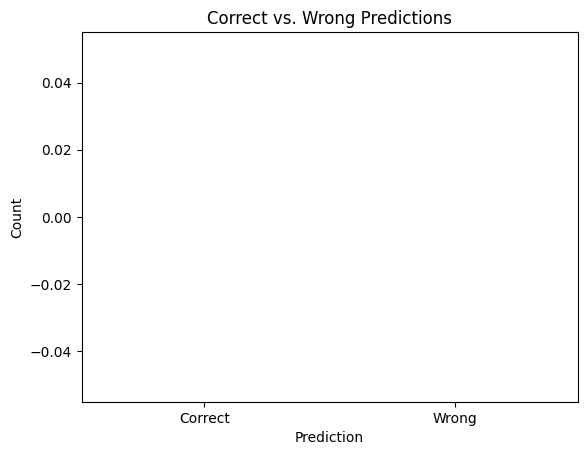

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of correct (1) and wrong (0) predictions
correct_count = np.count_nonzero(Y_compared == 1)
wrong_count = np.count_nonzero(Y_compared == 0)

# Create labels for the plot
labels = ['Correct', 'Wrong']
values = [correct_count, wrong_count]

# Determine the color for the 'Wrong' bar
colors = ['blue', 'red']
max_count = max(correct_count, wrong_count)
color_index = values.index(max_count)

# Plot the distribution
plt.bar(labels, values, color=colors)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Correct vs. Wrong Predictions')
plt.show()


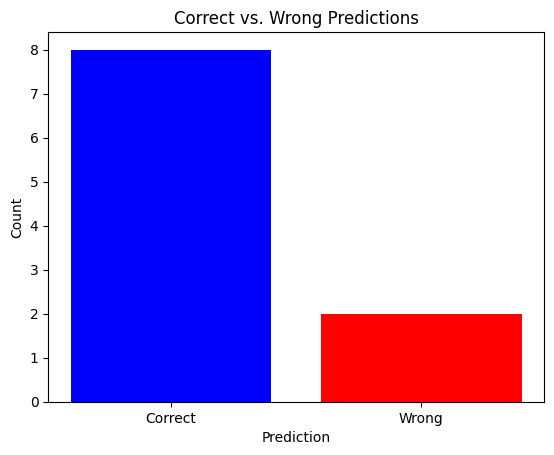

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have an ndarray called 'prediction_array'
prediction_array = np.array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

# Count the occurrences of correct (1) and wrong (0) predictions
correct_count = np.count_nonzero(prediction_array == 1)
wrong_count = np.count_nonzero(prediction_array == 0)

# Create labels for the plot
labels = ['Correct', 'Wrong']
values = [correct_count, wrong_count]

# Determine the color for the 'Wrong' bar
colors = ['blue', 'red']
max_count = max(correct_count, wrong_count)
color_index = values.index(max_count)

# Plot the distribution
plt.bar(labels, values, color=colors)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Correct vs. Wrong Predictions')
plt.show()
